In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import lightgbm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X_test = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\regression_Xtest.csv')
X_train = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\regression_Xtrain.csv')
y_test = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\regression_ytest.csv')
y_train = pd.read_csv(r'C:\Users\lucia\OneDrive - University of Calgary\University\Year 3\Semester 2\Bmen 415\Coursework\Course Project\_FINAL DATASETS\regression_ytrain.csv')

In [3]:
def model_metrics(model):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('Training MSE:', mean_squared_error(y_train, y_train_pred))
    print('Training r^2:', r2_score(y_train, y_train_pred))
    print('Testing MSE:', mean_squared_error(y_test, y_test_pred))
    print('Testing r^2:', r2_score(y_test, y_test_pred))

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    plt.scatter(y_test, y_test_pred)
    plt.title('Predicted vs. Actual (test data)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.show()

NOTES ON MODEL TUNING and PROCESSING

Similar to the classification dataset, here model tuning will be used to (hopefully) improve model performance, or at lesat to differentiate these models from other models in the group which may otherwise be identical (e.g. Random Forest). Model performance will here be optimized, and reported, using mean square error which is typical for regression machine learning. Scatter plots of actual vs predicted outputs for the test data will also be reported in order to better visualize model performance.

Once again, feature selection and other preprocessing (e.g. scaling) was NOT performed on the intial dataset, so it may lead to limitations which some models (e.g. elastic net regression) which will be affected if different features have significantly different ranges.

### 1. Elastic net regression

Elastic net regression is inherently a linear model, which is an obvious limitation since this data may not be (and is likely not) fully linear. However, it does have the ability to perform some feature selection.

In [4]:
from sklearn.linear_model import ElasticNet

In [14]:
## MODEL TUNING

CV = KFold(n_splits = 5, shuffle = True, random_state = 112)

# Preliminary grid search (searches 10x5x5 = 250 sets of 'random' values)

grid = {'max_iter': list(np.arange(100, 2000, 200)),
        'l1_ratio': list(np.arange(0, 1.1, 0.2)),
        'alpha': list(np.arange(0, 1.1, 0.2))}

prelim_grid_search = GridSearchCV(estimator = ElasticNet(random_state = 112), param_grid = grid, scoring = 'neg_mean_squared_error', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

# NOTE: l1_ratio = 0 --> l2 regularization, max_iter = min value given --> possible indication of poor model

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07847424768126432, tolerance: 2.8802223297133496e-05
  positive)


{'alpha': 0.2, 'l1_ratio': 0.0, 'max_iter': 100}

Training MSE: 0.0023416441704986577
Testing MSE: 0.002411272976883384


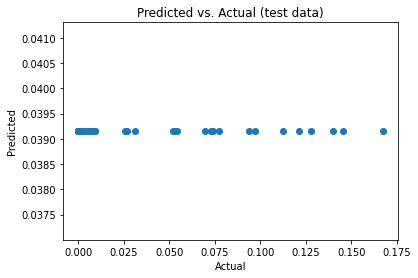

In [15]:
## MODEL BUILDING - before model tuning

eln = ElasticNet(random_state = 112)

model_metrics(eln)

Training MSE: 0.0012088890730316403
Testing MSE: 0.0016852723067013156


c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07847424768126432, tolerance: 2.8802223297133496e-05
  positive)


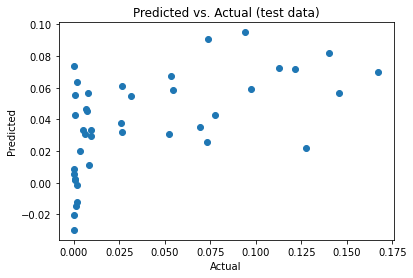

In [16]:
## MODEL BUILDING - after model tuning

eln = ElasticNet(alpha = 0.2, l1_ratio = 0, max_iter = 100, random_state = 112)

model_metrics(eln)

We can see that model performance - while poor both before and after model tuning - is much improved by model tuning. MSE is approximately halved, and more importantly, the model is now making more reasonable predictions rather than predicting all data to have a singular output value.

### 2. Random forest

Advantages of random forest include that no feature scaling is required and that it independently performs feature selection as part of the algorithm. It does not assume linear data, which is also an advantage. However, it often overfits and is not easily interpretable.

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
## MODEL TUNING

CV = KFold(n_splits = 5, shuffle = True, random_state = 112)

# Preliminary grid search (searches 10x6x5 = 300 sets of 'random' values)
grid = {'n_estimators': list(np.arange(10, 211, 20)), # no. different trees (probably should not > no. instances)
        'max_depth': list(np.arange(1, 32, 5)),      # no. levels in each tree (probably should not > no. features)
        'min_samples_split': list(np.arange(2, 11, 2))} # how many individuals needed in a node before splitting

prelim_grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state = 112), param_grid = grid, scoring = 'neg_mean_squared_error', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

# NOTE: n_estimators = min value given --> this model restriction could possibly indicate the high overfitting present in RF and is trying to compensate for it

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 10}

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training MSE: 0.00018396239026970848
Testing MSE: 0.0015143862677991988


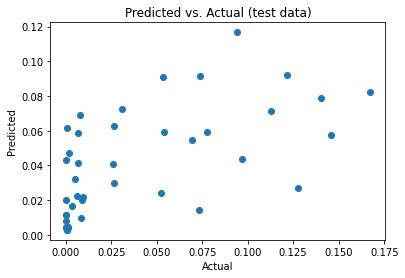

In [23]:
## MODEL BUILDING - before model tuning

rf = RandomForestRegressor(random_state = 112)

rf.fit(X_train, y_train)

model_metrics(rf)

c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
c:\Users\lucia\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training MSE: 0.0002313963746464324
Testing MSE: 0.001547170622828515


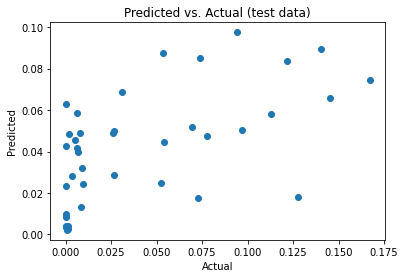

In [31]:
## MODEL BUILDING - after model tuning

rf = RandomForestRegressor(max_depth = 11, min_samples_split = 2, n_estimators = 10, random_state = 112)

rf.fit(X_train, y_train)

model_metrics(rf)

Here, the model performance is slightly worse after model tuning (slightly higher MSE for both test and training), suggesting that the random forest model is already relatively robust and may not be able to be much improved for this dataset.

### 3. LightGBM

This model type is based on a decision tree framework, and is known for its high speed and accuracy. While RF builds  decision trees independently and then combines their predictions, GBTs actually build trees sequentially so that each new tree corrects the mistakes of the previous one; this tends to lead to higher accuracy for gradient boosting tree models compared to simple ensemble tree models. However, this also means lightGBM will be somewhat less interpretable.

In [21]:
from lightgbm import LGBMRegressor

In [28]:
## MODEL TUNING

CV = KFold(n_splits = 5, shuffle = True, random_state = 112)

# Preliminary grid search (searches 4x6x5x5 = 600 sets of 'random' values)
grid = {'n_estimators': list(np.arange(10, 211, 50)),
        'max_depth': list(np.arange(5, 36, 5)),
        'reg_alpha': list(np.arange(0, 1.1, 0.2)),
        'reg_alpha': list(np.arange(0, 1.1, 0.2))}

prelim_grid_search = GridSearchCV(estimator = LGBMRegressor(random_state = 112), param_grid = grid, scoring = 'neg_mean_squared_error', cv = CV, n_jobs = -1)
prelim_grid_search.fit(X_train, y_train)

prelim_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 60, 'reg_alpha': 0.0}

Training MSE: 0.00018903878800492893
Testing MSE: 0.0014250384146453


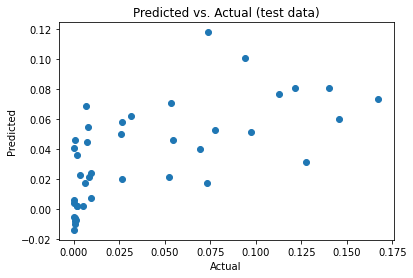

In [25]:
## MODEL BUILDING - before model tuning

lgbm = LGBMRegressor(random_state = 112)

lgbm.fit(X_train, y_train)

model_metrics(lgbm)

Training MSE: 0.0001689969809259506
Testing MSE: 0.0014056610445454083


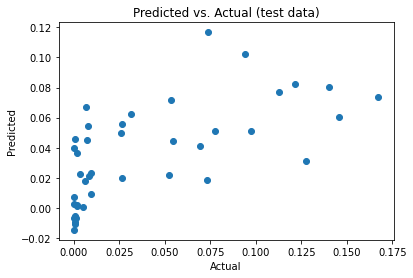

In [27]:
## MODEL BUILDING - after model tuning

lgbm = LGBMRegressor(max_depth = 5, n_estimators = 110, reg_alpha = 0, random_state = 112)

lgbm.fit(X_train, y_train)

model_metrics(lgbm)

For this model, we can see that model tuning improved model performance very slightly (very slight decrease in MSE for both train and test data).

When analyzing both MSE results and the scatter plots themselves, we can conclude that LightGBM indeed provides the best model for this dataset. This was hypothesized since LightGBM should be the most complex model (and our data is likely not simple linear), as well as due to the aforementioned pros and cons.